<a href="https://colab.research.google.com/github/LaxmiSahithiNagarapu/LaxmiSahithi_INFO5731_Spring_2023/blob/main/Nagarapu_In_class_exercise_03_02282023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## The third In-class-exercise (2/28/2023, 40 points in total)

The purpose of this exercise is to understand text representation.

Question 1 (10 points): Describe an interesting text classification or text mining task and explain what kind of features might be useful for you to build the machine learning model. List your features and explain why these features might be helpful. You need to list at least five different types of features.

**Answer**: I'm interested in learning how people feel about a product. I want to concentrate on the word "oximeter" here. During COVID-19, a large number of individuals began utilizing it to keep track of their health. 
I now wanted to know which features customers found beneficial and what they thought of the product. 
I want to start by concentrating on a certain manufacturer's product and running sentiment analysis on user evaluations. The frequency vector for the data cloud would provide me with information on the features that the users are examining, and the sentiment analysis would help me comprehend the input from users.I want to apply the POS tagging method to analyze the sentiment in review content. The text's parts of speech identify each sentence's primary context, purposes, and usage. Using the definitions and the context, I will classify each word in the text according to the part of speech it belongs to in this approach. Nouns, verbs, personal pronouns, adjectives, adverbs, coordinating conjunctions, and interjections are a few speech markers that I prefer to concentrate on. These reviews with POS tags are transformed into a matrix of integers and provided to classifiers as input. The Classifier will identify the text's emotion.
Here is the link for reviews of the product 'Zacurate Pro Series 500DL Fingertip Pulse Oximeter':  https://www.amazon.com/Zacurate-Fingertip-Oximeter-Saturation-Batteries/product-reviews/B07PQ8WTC4/ref=cm_cr_getr_d_paging_btm_next_3?ie=UTF8&reviewerType=all_reviews&pageNumber=3


Question 2 (10 points): Write python code to extract these features you discussed above. You can collect a few sample text data for the feature extraction. 

In [ ]:
# You code here (Please add comments in the code):

from bs4 import BeautifulSoup
import requests
import urllib.request
import re
import pandas as pd
Headers = {
    'Access-Control-Allow-Origin': '*',
    'Access-Control-Allow-Methods': 'GET',
    'Access-Control-Allow-Headers': 'Content-Type',
    'Access-Control-Max-Age': '3600',
    'User-Agent': 'Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:52.0) Gecko/20100101 Firefox/52.0',
    'Accept-Language': 'en-US, en;q=0.5'
}

titles = []
text=[]
for pg in range(1,150):
  url = 'https://www.amazon.com/Zacurate-Fingertip-Oximeter-Saturation-Batteries/product-reviews/B07PQ8WTC4/ref=cm_cr_arp_d_paging_btm_next_{str(pg_num)}?ie=UTF8&reviewerType=all_reviews&pageNumber={str(pg_num)}'

  pg = requests.get(url, headers=Headers)
  s = BeautifulSoup(pg.content,'html.parser')
  revw_t = s.find_all('a',class_='review-title-content')
  for i in range(len(revw_t)):
    titles.append(revw_t[i].get_text().strip())
  revw_txt= s.find_all('span',class_='review-text-content')
  for r in range(0,len(revw_txt)):
    text.append(revw_txt[r].get_text().strip()) 
df_revw = pd.DataFrame({
    'Title' : titles,
    'Review': text
})
print(f'Shape of the data frame: {df_revw.shape}')
df_revw.head()

Shape of the data frame: (110, 2)


,Title,Review
0,Zacurate Oximeter vs. MiBest: Which is best in...,"In this uncertain Covid era, we learned it was..."
1,like it enough to buy another,i bought a second oximeter to always keep one ...
2,Pulse oximeter-a very useful medical device.,I use it to check my O2 saturations and heart ...
3,Covid Essential,Purchased during our first time with covid sim...
4,I'm pleased.,It works perfectly well. I'm pleased and expe...


In [ ]:
df_revw["preprocessed_review"] = df_revw['Review'].str.replace('[^\w\s]','')
df_revw.head()

<ipython-input-2-f7811169a042>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df_revw["preprocessed_review"] = df_revw['Review'].str.replace('[^\w\s]','')


,Title,Review,preprocessed_review
0,Zacurate Oximeter vs. MiBest: Which is best in...,"In this uncertain Covid era, we learned it was...",In this uncertain Covid era we learned it was ...
1,like it enough to buy another,i bought a second oximeter to always keep one ...,i bought a second oximeter to always keep one ...
2,Pulse oximeter-a very useful medical device.,I use it to check my O2 saturations and heart ...,I use it to check my O2 saturations and heart ...
3,Covid Essential,Purchased during our first time with covid sim...,Purchased during our first time with covid sim...
4,I'm pleased.,It works perfectly well. I'm pleased and expe...,It works perfectly well Im pleased and expect...


In [ ]:
df_revw["preprocessed_review"] = df_revw['preprocessed_review'].str.replace('\d+', '')
# remove special characters
import re
df_revw["preprocessed_review"] = df_revw['preprocessed_review'].apply(lambda t : ''.join(re.sub(r"[^a-zA-Z0-9]+", ' ', ch) for ch in t))
df_revw.head()

<ipython-input-3-6abc76212b44>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df_revw["preprocessed_review"] = df_revw['preprocessed_review'].str.replace('\d+', '')


,Title,Review,preprocessed_review
0,Zacurate Oximeter vs. MiBest: Which is best in...,"In this uncertain Covid era, we learned it was...",In this uncertain Covid era we learned it was ...
1,like it enough to buy another,i bought a second oximeter to always keep one ...,i bought a second oximeter to always keep one ...
2,Pulse oximeter-a very useful medical device.,I use it to check my O2 saturations and heart ...,I use it to check my O saturations and heart r...
3,Covid Essential,Purchased during our first time with covid sim...,Purchased during our first time with covid sim...
4,I'm pleased.,It works perfectly well. I'm pleased and expe...,It works perfectly well Im pleased and expect...


In [ ]:
df_revw['preprocessed_review'] = df_revw['preprocessed_review'].apply(lambda text: " ".join(word.lower() for word in text.split()))
df_revw.head()

,Title,Review,preprocessed_review
0,Zacurate Oximeter vs. MiBest: Which is best in...,"In this uncertain Covid era, we learned it was...",in this uncertain covid era we learned it was ...
1,like it enough to buy another,i bought a second oximeter to always keep one ...,i bought a second oximeter to always keep one ...
2,Pulse oximeter-a very useful medical device.,I use it to check my O2 saturations and heart ...,i use it to check my o saturations and heart r...
3,Covid Essential,Purchased during our first time with covid sim...,purchased during our first time with covid sim...
4,I'm pleased.,It works perfectly well. I'm pleased and expe...,it works perfectly well im pleased and expect ...


In [ ]:
import nltk
nltk.download("stopwords")
#nltk.download()
from nltk.corpus import stopwords
sw = stopwords.words('english')
df_revw['preprocessed_review'] = df_revw['preprocessed_review'].apply( lambda text : " ".join(w for w in text.split() if w not in sw) )
df_revw.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,Title,Review,preprocessed_review
0,Zacurate Oximeter vs. MiBest: Which is best in...,"In this uncertain Covid era, we learned it was...",uncertain covid era learned wise oximeter hand...
1,like it enough to buy another,i bought a second oximeter to always keep one ...,bought second oximeter always keep one close h...
2,Pulse oximeter-a very useful medical device.,I use it to check my O2 saturations and heart ...,use check saturations heart rate oxygen someti...
3,Covid Essential,Purchased during our first time with covid sim...,purchased first time covid simply peace mind e...
4,I'm pleased.,It works perfectly well. I'm pleased and expe...,works perfectly well im pleased expect use oft...


In [ ]:
import nltk
nltk.download("popular")
from textblob import Word
df_revw['preprocessed_review'] = df_revw['preprocessed_review'].apply( lambda text : " ".join([ Word(i).lemmatize() for i in text.split()]))
df_revw.head()

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gazetteers.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/genesis.zip.
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gutenberg.zip.
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/inaugural.zip.
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/movie_reviews.zip.
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/names.zip.
[nltk_data]    | Downloading package shakespeare to /root/nltk_data...
[nlt

,Title,Review,preprocessed_review
0,Zacurate Oximeter vs. MiBest: Which is best in...,"In this uncertain Covid era, we learned it was...",uncertain covid era learned wise oximeter hand...
1,like it enough to buy another,i bought a second oximeter to always keep one ...,bought second oximeter always keep one close h...
2,Pulse oximeter-a very useful medical device.,I use it to check my O2 saturations and heart ...,use check saturation heart rate oxygen sometim...
3,Covid Essential,Purchased during our first time with covid sim...,purchased first time covid simply peace mind e...
4,I'm pleased.,It works perfectly well. I'm pleased and expe...,work perfectly well im pleased expect use ofte...


In [ ]:
nltk.download('averaged_perceptron_tagger')
from nltk import pos_tag
df_revw['tagged_pos'] = df_revw['preprocessed_review'].str.split().map(pos_tag)
df_revw.head()

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


,Title,Review,preprocessed_review,tagged_pos
0,Zacurate Oximeter vs. MiBest: Which is best in...,"In this uncertain Covid era, we learned it was...",uncertain covid era learned wise oximeter hand...,"[(uncertain, JJ), (covid, NN), (era, NN), (lea..."
1,like it enough to buy another,i bought a second oximeter to always keep one ...,bought second oximeter always keep one close h...,"[(bought, JJ), (second, JJ), (oximeter, NN), (..."
2,Pulse oximeter-a very useful medical device.,I use it to check my O2 saturations and heart ...,use check saturation heart rate oxygen sometim...,"[(use, NN), (check, NN), (saturation, NN), (he..."
3,Covid Essential,Purchased during our first time with covid sim...,purchased first time covid simply peace mind e...,"[(purchased, VBN), (first, JJ), (time, NN), (c..."
4,I'm pleased.,It works perfectly well. I'm pleased and expe...,work perfectly well im pleased expect use ofte...,"[(work, NN), (perfectly, RB), (well, RB), (im,..."


In [ ]:
adjective = []
adverb = []
c_con = []
s_con = []
intj = []
no = []
ve = []
pro = []
pre = []
det= []
def tags(atags):
  for t in atags:
    na= 0
    nad = 0
    ncon= 0
    nsconj = 0
    ninter = 0
    nno = 0
    nve= 0
    nppro= 0
    npredet = 0
    ndet = 0
    for i,j in t:
      if j == 'JJ':
        na =  na + 1
      elif j == 'RB':
        nad = nad + 1
      elif j == 'CC':
        nccon = nccon + 1
      elif j == 'UH':
        ninter = ninter + 1
      elif j == 'NN':
        nno = nno + 1
      elif j == 'VR':
        nve = nve + 1
      elif j == 'PRP':
        nppro = nppro + 1
      elif j == 'PDT':
        npredet = npredet + 1
      elif j == 'DT':
        ndet = ndet + 1
      elif j == 'IN':
        nsconj = nsconj + 1
    
    adjective.append(na)
    adverb.append(nad)
    c_con.append(ncon)
    s_con.append(nsconj)
    intj.append(ninter)
    no.append(nno)
    ve.append(nve)
    pro.append(nppro)
    pre.append(npredet)
    det.append(ndet)
tags(df_revw['tagged_pos'])
df_revw['num of adj'] = adjective
df_revw['num of adverb'] = adverb
df_revw['num of conjunction'] = c_con
df_revw['num of conjuction'] = s_con
df_revw['num of interjection'] = intj
df_revw['num of noun'] = no
df_revw['num of verb'] = ve
df_revw['num of pronoun'] = pro
df_revw['num of predeterminer'] = pre
df_revw['num of determiner'] = det

df_revw.head()

,Title,Review,preprocessed_review,tagged_pos,num of adj,num of adverb,num of conjunction,num of conjuction,num of interjection,num of noun,num of verb,num of pronoun,num of predeterminer,num of determiner
0,Zacurate Oximeter vs. MiBest: Which is best in...,"In this uncertain Covid era, we learned it was...",uncertain covid era learned wise oximeter hand...,"[(uncertain, JJ), (covid, NN), (era, NN), (lea...",52,28,0,2,0,90,0,0,0,0
1,like it enough to buy another,i bought a second oximeter to always keep one ...,bought second oximeter always keep one close h...,"[(bought, JJ), (second, JJ), (oximeter, NN), (...",27,7,0,1,0,26,0,0,0,1
2,Pulse oximeter-a very useful medical device.,I use it to check my O2 saturations and heart ...,use check saturation heart rate oxygen sometim...,"[(use, NN), (check, NN), (saturation, NN), (he...",5,3,0,0,0,16,0,0,0,0
3,Covid Essential,Purchased during our first time with covid sim...,purchased first time covid simply peace mind e...,"[(purchased, VBN), (first, JJ), (time, NN), (c...",7,3,0,1,0,12,0,0,0,0
4,I'm pleased.,It works perfectly well. I'm pleased and expe...,work perfectly well im pleased expect use ofte...,"[(work, NN), (perfectly, RB), (well, RB), (im,...",13,9,0,1,0,17,0,0,0,0


Question 3 (10 points): Use any of the feature selection methods mentioned in this paper "Deng, X., Li, Y., Weng, J., & Zhang, J. (2019). Feature selection for text classification: A review. Multimedia Tools & Applications, 78(3)." Select the most important features you extracted above, rank the features based on their importance in the descending order. 

In [ ]:
# You code here (Please add comments in the code):

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline

num = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
num_feat = df_revw.select_dtypes(include=num)
print(f'Shape: {num_feat.shape}')
num_feat.head()




Shape: (110, 10)


,num of adj,num of adverb,num of conjunction,num of conjuction,num of interjection,num of noun,num of verb,num of pronoun,num of predeterminer,num of determiner
0,52,28,0,2,0,90,0,0,0,0
1,27,7,0,1,0,26,0,0,0,1
2,5,3,0,0,0,16,0,0,0,0
3,7,3,0,1,0,12,0,0,0,0
4,13,9,0,1,0,17,0,0,0,0


In [ ]:
a = num_feat
b = df_revw['preprocessed_review']
print(f'SHAPE of X: {a.shape}')
print(f'SHAPE of Y: {b.shape}')


SHAPE of X: (110, 10)
SHAPE of Y: (110,)


In [ ]:
xt, xte, yt, yte = train_test_split(a, b, test_size=0.2, random_state=60)
xt.shape, xte.shape


((88, 10), (22, 10))

<AxesSubplot:>

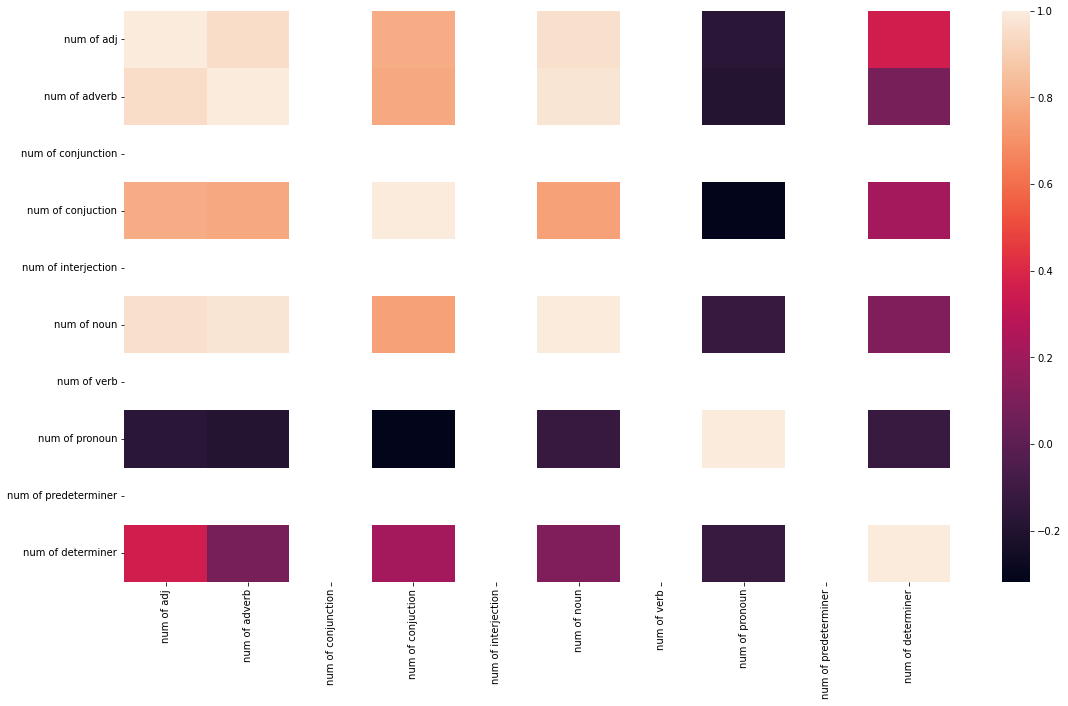

In [ ]:
cor = xt.corr()
f, a = plt.subplots()
f.set_size_inches(18.5, 10.5)
sns.heatmap(cor)

In [ ]:
def correlated(co, thres):
  col = []
  data = co.corr()
  for r in range(len(data.columns)):
    for c in range(r):
      if (abs(data.iloc[r, c]) > thres):
        col.append(data.columns[r])
  return col


corr = list(set(correlated(xt, 0.5)))
print(f'correlated features are: {set(corr)}')

correlated features are: {'num of noun', 'num of adverb', 'num of conjuction'}


In [ ]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=20, random_state=100, max_depth=2)
forest.fit(xt[corr].fillna(0), yt)

RandomForestClassifier(max_depth=2, n_estimators=20, random_state=100)

In [ ]:
w = pd.concat([pd.Series(corr), pd.Series(forest.feature_importances_)], axis=1)
w.columns = ['columns', 'weight']
w.sort_values(by='weight', ascending=False)

,columns,weight
0,num of noun,0.400431
2,num of conjuction,0.394448
1,num of adverb,0.205121


Question 4 (10 points): Write python code to rank the text based on text similarity. Based on the text data you used for question 2, design a query to match the most relevant docments. Please use the BERT model to represent both your query and the text data, then calculate the cosine similarity between the query and each text in your data. Rank the similary with descending order. 

In [ ]:
# You code here (Please add comments in the code):

!pip install stop_words

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for stop_words: filename=stop_words-2018.7.23-py3-none-any.whl size=32910 sha256=9b4a0932ff9b981686f24814f08f490b8c62e12f14326af7bd94d5197d20a862
  Stored in directory: /root/.cache/pip/wheels/da/d8/66/395317506a23a9d1d7de433ad6a7d9e6e16aab48cf028a0f60
Successfully built stop_words


In [ ]:
!pip install sentence_transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 KB 2.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 36.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 27.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.2/199.2 KB 21.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 54.0 MB/s eta 0:00:00
  Created wheel for sentence_transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125938 sha256=cae953950c2af0de30b80c242fd2b370fd988097b3cde2247279a691428f18df
  Stored in directory: /root/.cache/pip/wheels/71/67/06/162a3760c40d74dd40bc855d527008d26341c2b0ecf3e8e11f
Successfully built sentence_transformers


In [ ]:
!pip install bertopic

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 120.7/120.7 KB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.2/88.2 KB 9.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 29.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 68.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for hdbscan: filename=hdbscan-0.8.29-cp39-cp39-linux_x86_64.whl size=3582070 sha256=8d91b1485f9ead9744035350cc1f121c2d0b25c2dab96104419a8c3d126ac429
  Stored in directory: /root/.cache/pip/wheels/05/6f/88/1a4c04276b98306f00217a1e300e6ba0252c6aa4f7616067ae
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82829 sha256=

In [ ]:
import re
from stop_words import get_stop_words
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))
stop_words = list(get_stop_words('en'))

#print((set(list(STOPWORDS)) | set(list(stop_words))))
stopwords = list(set(list(STOPWORDS)) | set(list(stop_words)))
stopwords = [re.sub('[^a-zA-Z0-9]+', '', word) for word in stopwords]

stopwords = stopwords + ['fyi', 'ily', 'britt', 'fyijr', 'fyyi', 'gwf', 'dear', 'hourahead', 'let', 'know', 'make', 'see', 'soon', 'hope', 'yes', 'incredibleforget',
                         'betweeneveryone', 'lexisnexis', 'pmeb', 'attend', 'attach', 'message', 'please', 'file']

df_revw['clean_preprocessed_review'] = df_revw['preprocessed_review'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stopwords)]))

df_revw['clean_preprocessed_review'].head

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


<bound method NDFrame.head of 0      uncertain covid era learned wise oximeter hand...
1      bought second oximeter always keep one close h...
2      use check saturation heart rate oxygen sometim...
3      purchased first time covid simply peace mind e...
4      work perfectly pleased expect use often recent...
                             ...                        
105    put battery stick finger get reading number bi...
106    like product give u piece mind knowing check o...
107    accurate pulse oximeter use afib heart conditi...
108    must item home monitor pulse blood oxygen affo...
109    pulse oximeter work seems fairly accurate far ...
Name: clean_preprocessed_review, Length: 110, dtype: object>

In [ ]:
import nltk
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [ ]:
print(len(list(df_revw['clean_preprocessed_review'])))
doc = []
for i in list(df_revw['clean_preprocessed_review']):
  if i != "":
    doc.append(i)

print(len(doc))

110
110


In [ ]:
from sentence_transformers import SentenceTransformer

sentence_model = SentenceTransformer("all-MiniLM-L6-v2")
embeddings = sentence_model.encode(doc, show_progress_bar=True)

Batches:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
from bertopic import BERTopic

topic_model = BERTopic(language="english", calculate_probabilities=True, verbose=True, n_gram_range=(2, 2))
topics, probs = topic_model.fit_transform(doc, embeddings)

2023-03-13 02:29:42,707 - BERTopic - Reduced dimensionality
2023-03-13 02:29:42,727 - BERTopic - Clustered reduced embeddings


In [ ]:
topic_model.get_topic(0)

[('zacurate pro', 0.024665764810598418),
 ('oxygen level', 0.024665764810598418),
 ('oximeter hand', 0.024665764810598418),
 ('came week', 0.024665764810598418),
 ('heart rate', 0.022427908251459475),
 ('press button', 0.014257742853733425),
 ('purchased directly', 0.014257742853733425),
 ('put fantastic', 0.014257742853733425),
 ('quick appear', 0.014257742853733425),
 ('advantage time', 0.014257742853733425)]

In [ ]:
topic_model.visualize_barchart(top_n_topics=10, n_words = 10, width = 300, height = 300)